<a href="https://colab.research.google.com/github/devopsopenshift/python/blob/main/guided_project/PDS_Extended_Project_LearnerNotebook_Student_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Statistical Methods For Decision Making

### Marks: 60 points

# Problem Statement 1 - Wholesale Customers Analysis

### Business Context

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### Objective

They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description



1. Buyer/Spender- ID's of customers
2. Region- Region of the distributor
3. Fresh- spending on Fresh Vegetables
4. Milk- spending on milk
5. Grocery- spending on grocery
6. Frozen- spending on frozen food
7. Detergents_paper- spending on detergents and toilet paper
8. Delicatessen- spending on instant foods





## Let us start by importing the required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats as st
from scipy.stats import iqr #To calculate the IQR - Interquartile Range
import statistics as stat # To calculate the MODE
from statistics import stdev # To calculate the standard deviation
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [2]:
# Read the data
df = pd.read_csv('Wholesale Customer.csv') ## Fill the blank to read the data

In [3]:
# Returns the first 5 rows
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## Data Overview

#### How many rows and columns are present in the data?

In [4]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(440, 9)

####  What are the datatypes of the different columns in the dataset?

In [5]:
# Check the datatypes
df.dtypes #Write an appropriate function to check teh data type of each column

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

#### Are there any missing values in the data?

In [6]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

#### Check the statistical summary of the data.

In [7]:
# Get the summary statistics of the numerical data
df.describe(include='number').T ## Write the appropriate function to print the statistical summary of the data (Hint - you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Explore all the categorical variables and provide observations on their frequency.

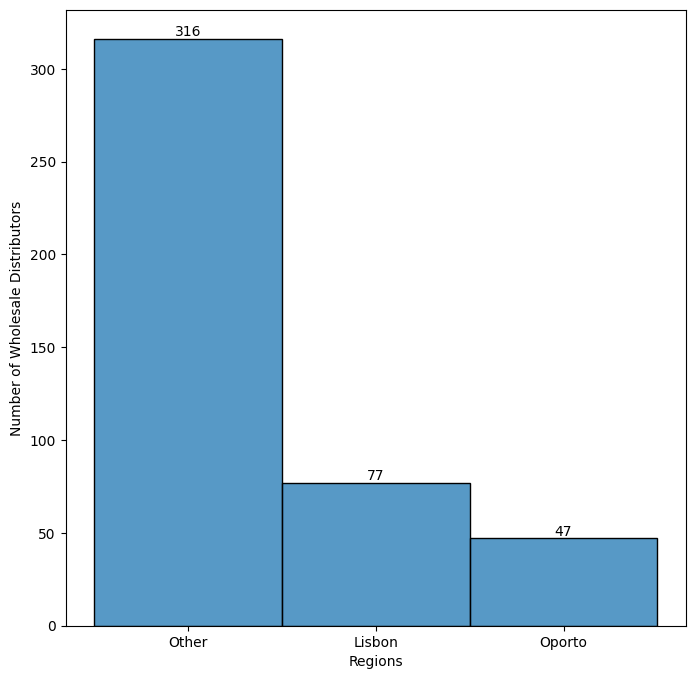

In [19]:
plt.figure(figsize=(8, 8))

p=sns.histplot(data=df, x='Region')  ## Complete the code to plot the graph
for c in p.containers:
  p.bar_label(c,  label_type='edge')

plt.xlabel('Regions')
plt.ylabel('Number of Wholesale Distributors')
plt.show()

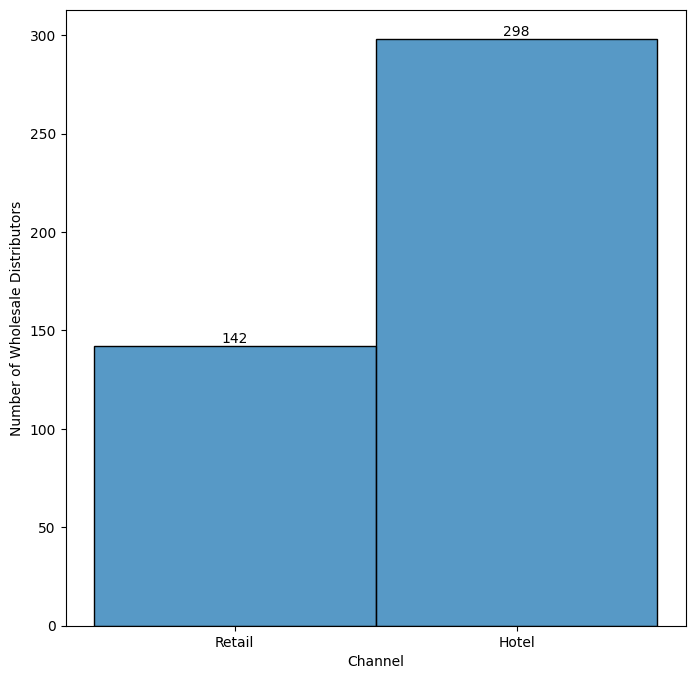

In [20]:
plt.figure(figsize=(8, 8))

p=sns.histplot(data=df, x='Channel')  ## Complete the code to plot the graph
for c in p.containers:
  p.bar_label(c,  label_type='edge')

plt.xlabel('Channel')
plt.ylabel('Number of Wholesale Distributors')
plt.show()

#### Find the distribution of spending across all categories

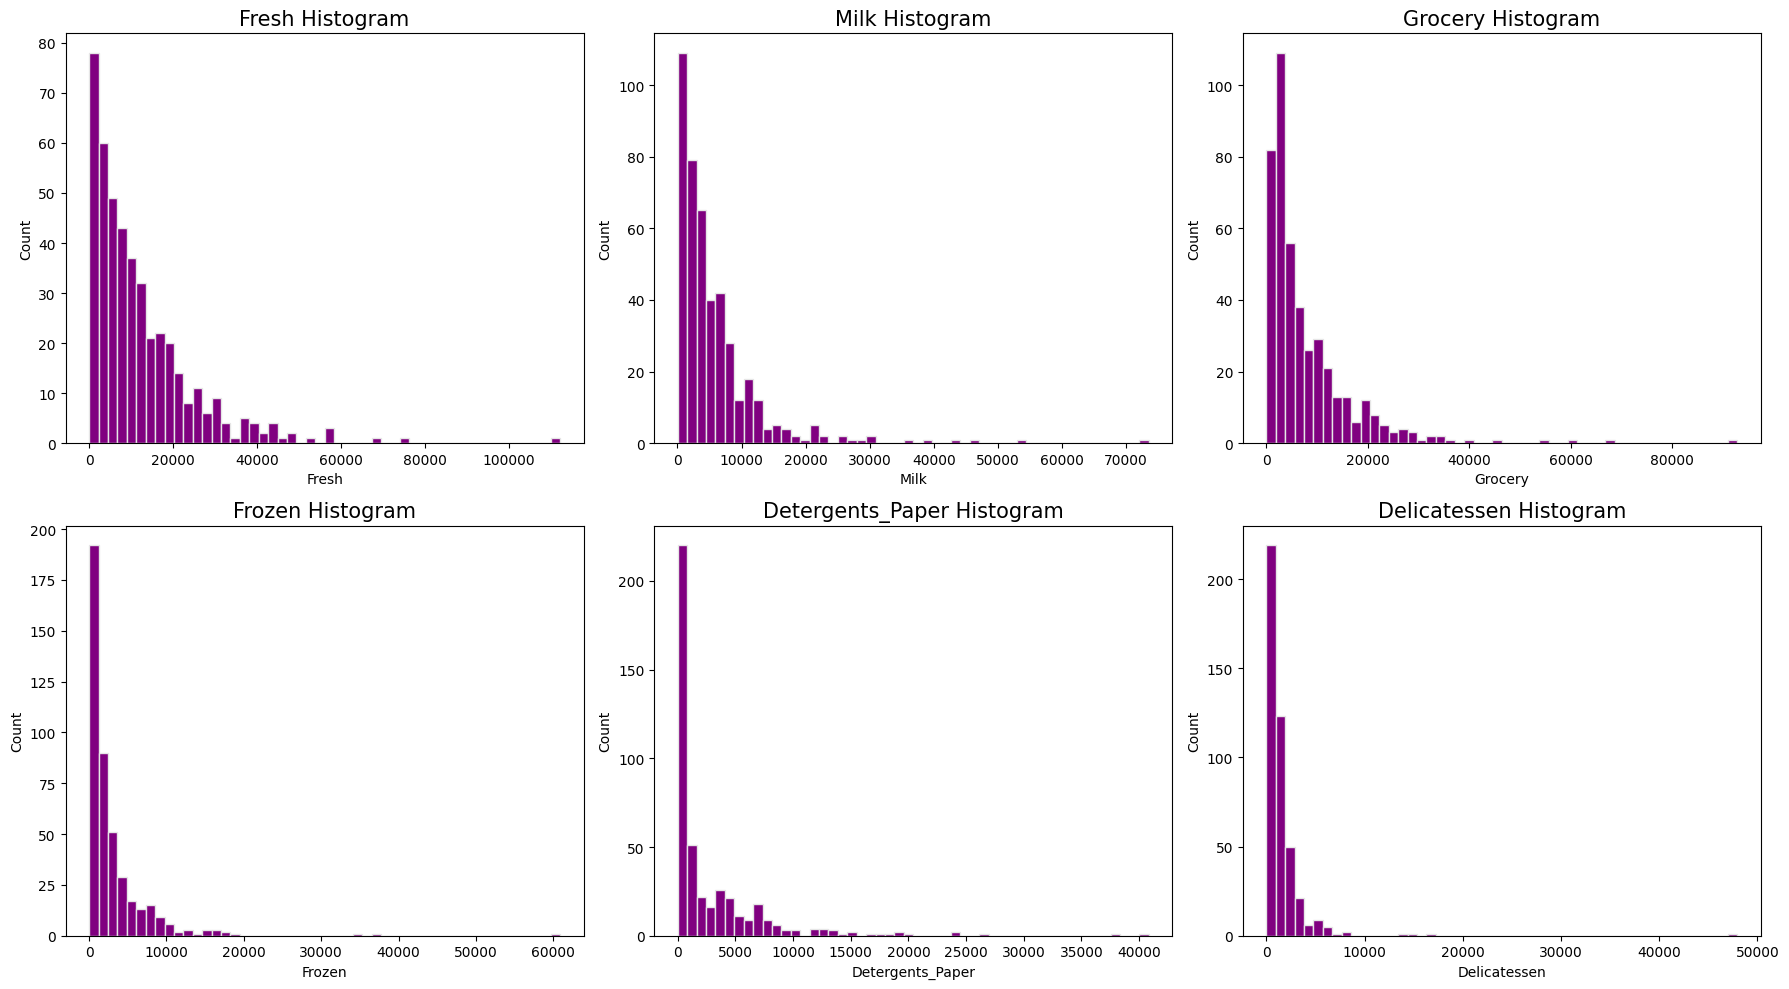

In [23]:
import matplotlib.pyplot as plt

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    ax.hist(df[col], bins=50, edgecolor='#E6E6E6', color='Purple') ## Complete the code to plot a histogram
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(col + " Histogram", fontsize=15)

plt.tight_layout()
plt.show()


#### Are there any outliers in the data?

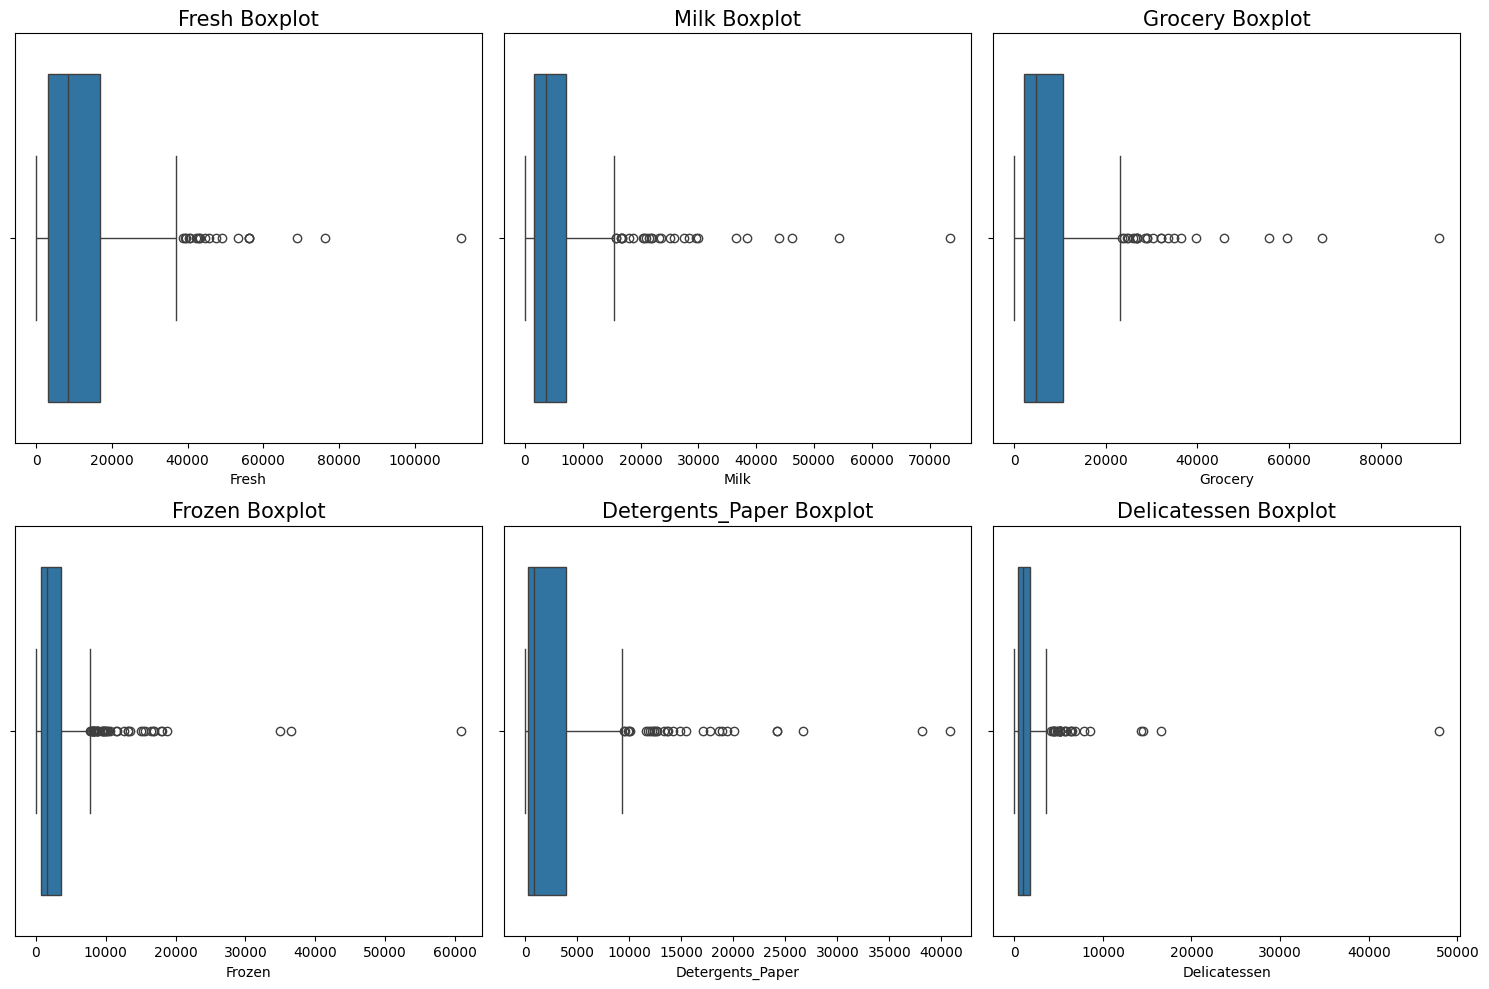

In [29]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    sns.boxplot(data=df, x=col, orient="v", ax=ax) ## Complete the code to create boxplot
    ax.set_title(col + " Boxplot", fontsize=15)

plt.tight_layout()
plt.show()


### Multivariate Analysis

**We will create a new column of total of spendings by adding the 6 different varieties.**

In [ ]:
Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64

In [9]:
from functools import reduce
## Adding row totals to the data frame
df['Total'] = reduce(lambda r, c: r + df[c], ['Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'], 0)
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


####  Find the total spending across all regions

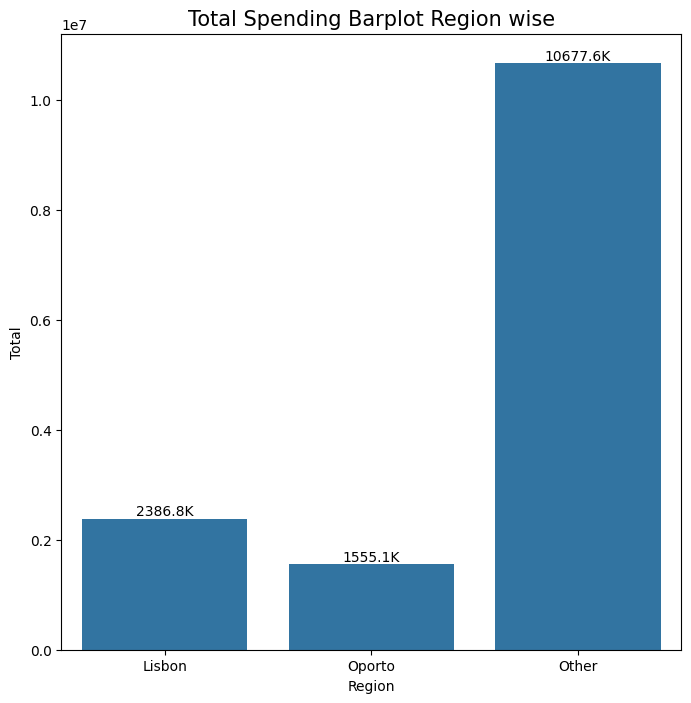

In [12]:
plt.figure(figsize=(8, 8))
RegionAggregated = df.groupby("Region")["Total"].sum().reset_index() ## Complete the create a temporary dataframe
ax=sns.barplot(x="Region", y="Total", data=RegionAggregated) ## Complete the code to find plot a bar graph
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title("Total Spending Barplot Region wise", fontsize=15)
plt.show()

#### Find the total spending of all the channels

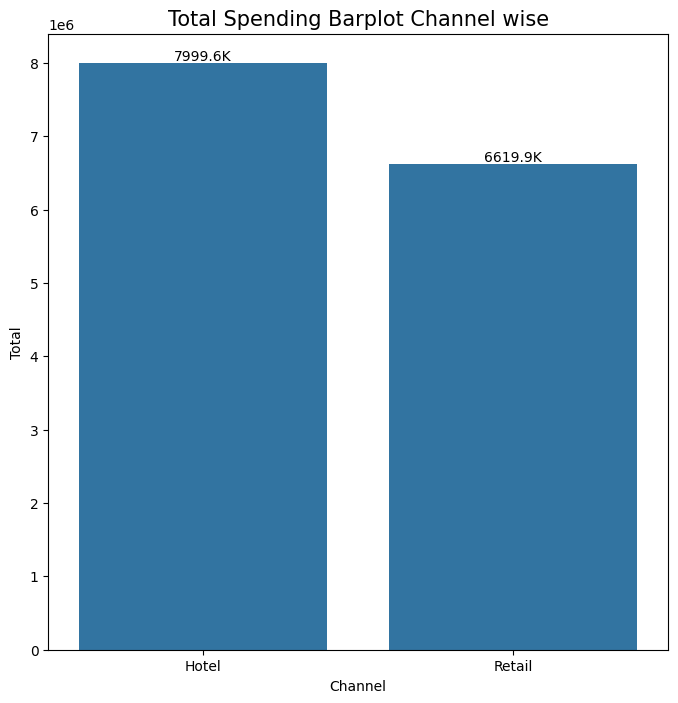

In [20]:
plt.figure(figsize=(8, 8))
## Complete the create a temporary dataframe
ChannelAggregated = df.groupby("Channel")["Total"].sum().reset_index() ## Complete the create a temporary dataframe
## Complete the code to find plot a bar graph
ax=sns.barplot(x="Channel", y="Total", data=ChannelAggregated) ## Complete the code to find plot a bar graph
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title("Total Spending Barplot Channel wise", fontsize=15)
plt.show()

#### Find the total spending across regions via different channels

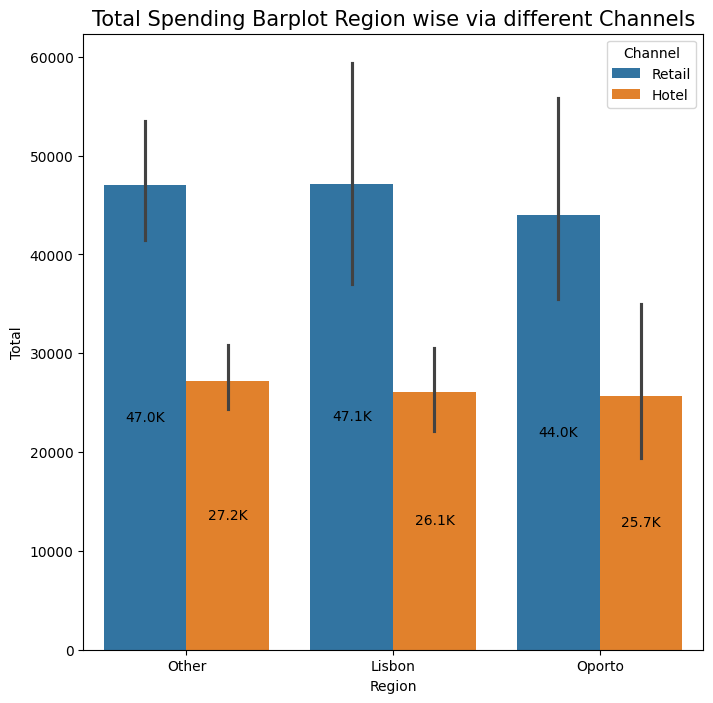

In [18]:
plt.figure(figsize=(8, 8))
ax=sns.barplot(x='Region', y='Total', hue='Channel',data=df)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
plt.title("Total Spending Barplot Region wise via different Channels", fontsize=15)
plt.show()

In [21]:
#Now drop the Total column
df.drop('Total',axis=1, inplace=True) ## Complete the code to drop the column

#### Find the total spending on each of the categories across different region and channels

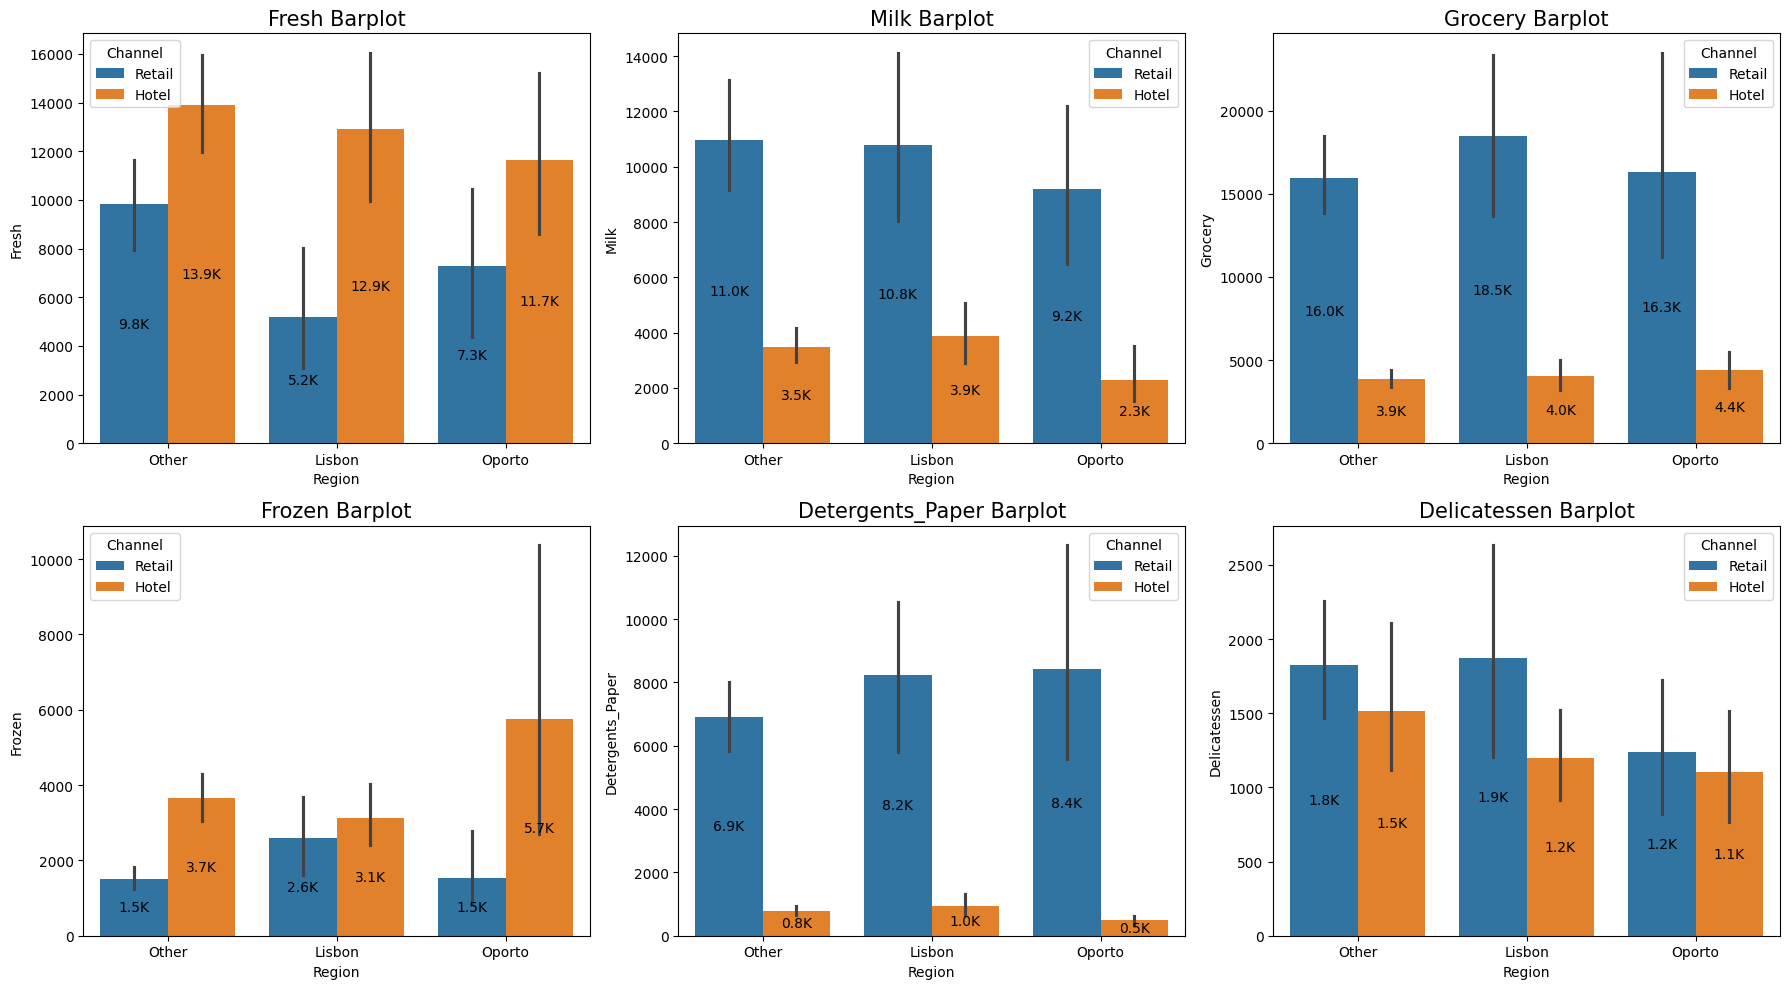

In [25]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    sbp=sns.barplot(data=df, x='Region',y=col, hue='Channel', orient="v", ax=ax)

    for c in sbp.containers:
      labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
      sbp.bar_label(c, labels=labels, label_type='center')

    ax.set_title(col + " Barplot", fontsize=15)

plt.tight_layout()
plt.show()

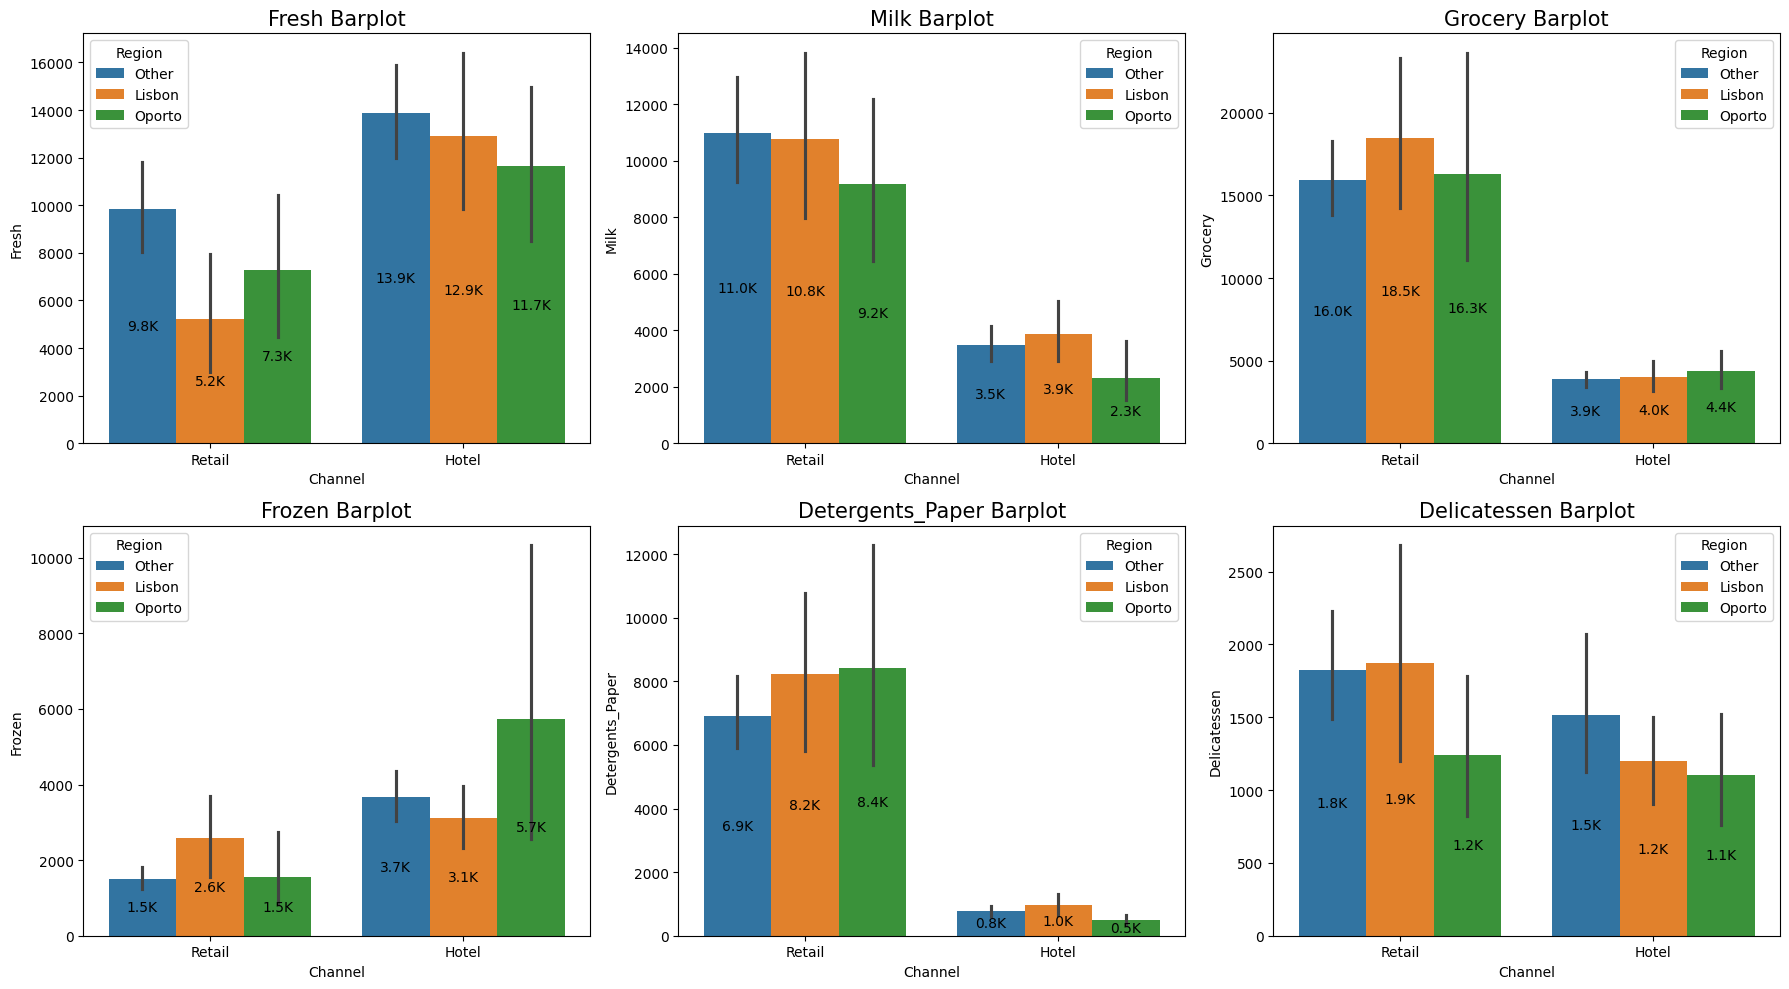

In [24]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    sbp=sns.barplot(data=df, x='Channel',y=col, hue='Region', orient="v", ax=ax)

    for c in sbp.containers:
      labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
      sbp.bar_label(c, labels=labels, label_type='center')

    ax.set_title(col + " Barplot", fontsize=15)

plt.tight_layout()
plt.show()

#### Do the item varieties show similar behavior across region and channel?

Hint: There are 6 different varieties of items in the data.

**We will subset the dataset with respect to region and channel.**

In [26]:
# Channel wise data subset
Retail = df[df['Channel'] == "Retail"]  ## Complete the create a temporary dataframe
Hotel = df[df['Channel'] == "Hotel"]  ## Complete the create a temporary dataframe

**To check the behaivour of the item varieties, we will check the statistical summary.**

In [27]:
Retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,142.0,183.000000,132.136132,1.0,61.25,166.5,303.75,438.0
Fresh,142.0,8904.323944,8987.714750,18.0,2347.75,5993.5,12229.75,44466.0
Milk,142.0,10716.500000,9679.631351,928.0,5938.00,7812.0,12162.75,73498.0
Grocery,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0
Frozen,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0
Detergents_Paper,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.50,40827.0
Delicatessen,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.00,16523.0


In [28]:
Hotel.describe().T ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,298.0,238.369128,120.910343,4.0,137.25,241.5,344.50,440.0
Fresh,298.0,13475.560403,13831.687502,3.0,4070.25,9581.5,18274.75,112151.0
Milk,298.0,3451.724832,4352.165571,55.0,1164.50,2157.0,4029.50,43950.0
Grocery,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0
Frozen,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0
Detergents_Paper,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.50,6907.0
Delicatessen,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.00,47943.0


In [31]:
# Region wise data subset
Lisbon = df[df['Region'] == "Lisbon"]  ## Complete the code to create a temporary dataframe
Oporto = df[df['Region'] == "Oporto"]  ## Complete the code to create a temporary dataframe
Other = df[df['Region'] == "Other"]  ## Complete the code to create a temporary dataframe

**To check the behaivour of the varities, we will do the descriptive analytics**

In [32]:
Lisbon.describe().T  ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,77.0,235.000000,22.371857,197.0,216.0,235.0,254.0,273.0
Fresh,77.0,11101.727273,11557.438575,18.0,2806.0,7363.0,15218.0,56083.0
Milk,77.0,5486.415584,5704.856079,258.0,1372.0,3748.0,7503.0,28326.0
Grocery,77.0,7403.077922,8496.287728,489.0,2046.0,3838.0,9490.0,39694.0
Frozen,77.0,3000.337662,3092.143894,61.0,950.0,1801.0,4324.0,18711.0
Detergents_Paper,77.0,2651.116883,4208.462708,5.0,284.0,737.0,3593.0,19410.0
Delicatessen,77.0,1354.896104,1345.423340,7.0,548.0,806.0,1775.0,6854.0


In [33]:
Oporto.describe().T  ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,47.0,317.000000,13.711309,294.0,305.5,317.0,328.5,340.0
Fresh,47.0,9887.680851,8387.899211,3.0,2751.5,8090.0,14925.5,32717.0
Milk,47.0,5088.170213,5826.343145,333.0,1430.5,2374.0,5772.5,25071.0
Grocery,47.0,9218.595745,10842.745314,1330.0,2792.5,6114.0,11758.5,67298.0
Frozen,47.0,4045.361702,9151.784954,131.0,811.5,1455.0,3272.0,60869.0
Detergents_Paper,47.0,3687.468085,6514.717668,15.0,282.5,811.0,4324.5,38102.0
Delicatessen,47.0,1159.702128,1050.739841,51.0,540.5,898.0,1538.5,5609.0


In [34]:
Other.describe().T  ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,316.0,202.613924,143.615303,1.0,79.75,158.5,361.25,440.0
Fresh,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.50,112151.0
Milk,316.0,5977.085443,7935.463443,55.0,1634.00,3684.5,7198.75,73498.0
Grocery,316.0,7896.363924,9537.287778,3.0,2141.50,4732.0,10559.75,92780.0
Frozen,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0
Detergents_Paper,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0
Delicatessen,316.0,1620.601266,3232.581660,3.0,402.00,994.0,1832.75,47943.0


#### Is there any correlation between the different item varieties in terms of spending?

<Axes: >

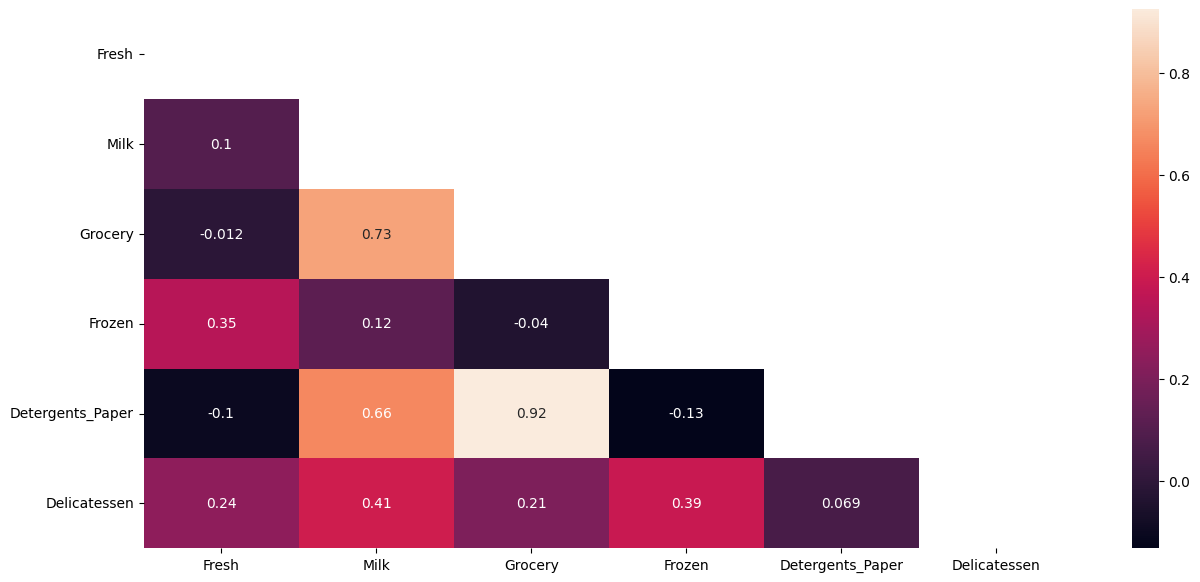

In [42]:
sns.color_palette("tab10")
varieties=['Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen']
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df[varieties].corr(), dtype=bool))
sns.heatmap(df[varieties].corr(),annot = True,mask=mask)

## Conclusions and Recommendations

#### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

#### Conclusions:
*  

#### Recommendations:
*  

# Problem Statement 2 - Education - Post 12th Standard

### Objective

The objective of this analysis is to gain insights into the characteristics of colleges and answer key questions related to the educational landscape. By understanding the data, we aim to inform strategies for improving the quality of education and enhancing the overall college experience. The analysis will provide valuable insights and recommendations for stakeholders in the education sector.

### Data Description

*  Names: Names of various university and colleges
*  Apps: Number of applications received
*  Accept: Number of applications accepted
*  Enroll: Number of new students enrolled
*  Top10perc: Percentage of new students from top 10% of Higher Secondary class
*  Top25perc: Percentage of new students from top 25% of Higher Secondary class
*  F.Undergrad: Number of full-time undergraduate students
*  P.Undergrad: Number of part-time undergraduate students
*  Outstate: Number of students for whom the particular college or university is Out-of-state tuition
*  Room.Board: Cost of Room and board
*  Books: Estimated book costs for a student
*  Personal: Estimated personal spending for a student
*  PhD: Percentage of faculties with Ph.D.’s
*  Terminal: Percentage of faculties with terminal degree
*  S.F.Ratio: Student/faculty ratio
*  perc.alumni: Percentage of alumni who donate
*  Expend: The Instructional expenditure per student
*  Grad.Rate: Graduation rate

## Let us start by importing the required libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

## Understanding the structure of the data

In [44]:
# Read the data
df = pd.read_csv('/content/Education - Post 12th Standard (1) (2).csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


#### How many rows and columns are present in the data?

In [50]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(777, 18)

####  What are the datatypes of the different columns in the dataset?

In [46]:
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

#### Are there any missing values in the data?

In [47]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

#### Check the statistical summary of the data.Which Region and which Channel seems to be spend more? Which Region and which Channel seems to spend less?

In [55]:
# Get the summary statistics of the numerical data
df.describe().T ## Write the appropriate function to print the statistical summary of the data (Hint - you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
Apps,777.00,3001.64,3870.20,81.00,776.00,1558.00,3624.00,48094.00
Accept,777.00,2018.80,2451.11,72.00,604.00,1110.00,2424.00,26330.00
Enroll,777.00,779.97,929.18,35.00,242.00,434.00,902.00,6392.00
Top10perc,777.00,27.56,17.64,1.00,15.00,23.00,35.00,96.00
Top25perc,777.00,55.80,19.80,9.00,41.00,54.00,69.00,100.00
F.Undergrad,777.00,3699.91,4850.42,139.00,992.00,1707.00,4005.00,31643.00
P.Undergrad,777.00,855.30,1522.43,1.00,95.00,353.00,967.00,21836.00
Outstate,777.00,10440.67,4023.02,2340.00,7320.00,9990.00,12925.00,21700.00
Room.Board,777.00,4357.53,1096.70,1780.00,3597.00,4200.00,5050.00,8124.00
Books,777.00,549.38,165.11,96.00,470.00,500.00,600.00,2340.00


#### Drop the column which does not exhibit any value

In [54]:
#Now drop the irrelevant column
df.dropna(how='all',axis=1, inplace=True) ## Complete the code to drop the column

## Exploratory Data Analysis (EDA)

### Univariate Analysis

Apps
Skew : 3.72


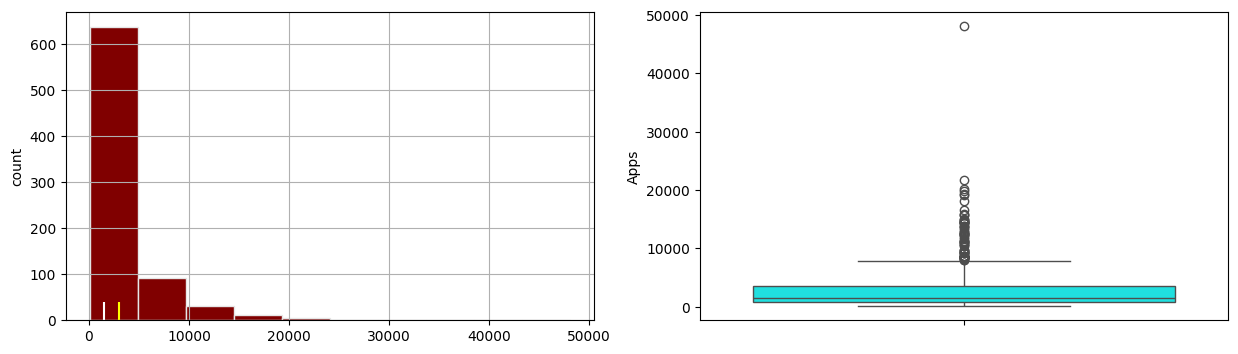

Accept
Skew : 3.42


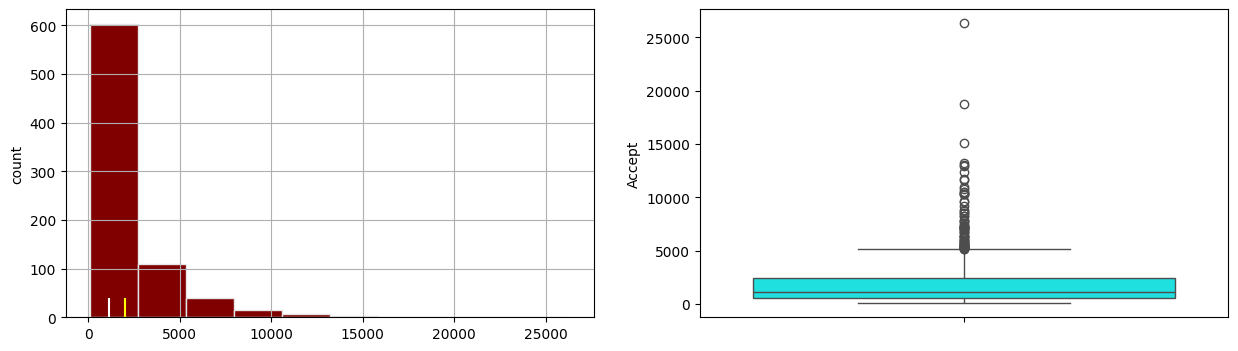

Enroll
Skew : 2.69


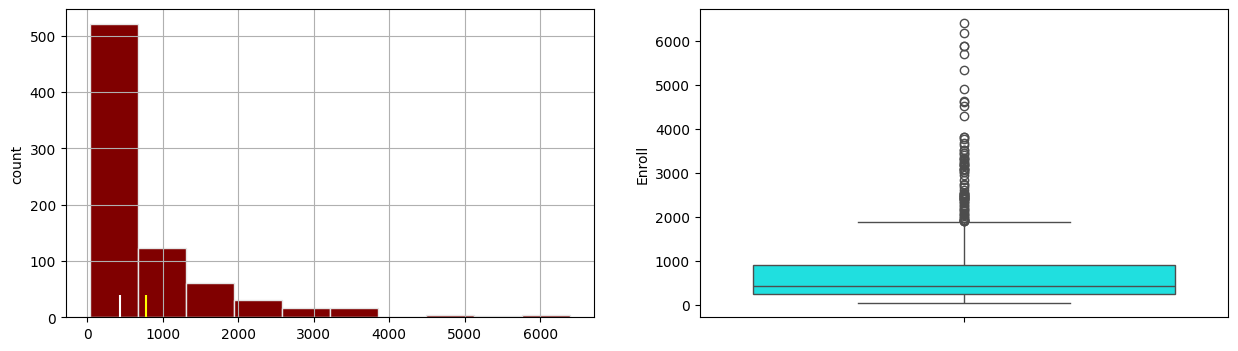

Top10perc
Skew : 1.41


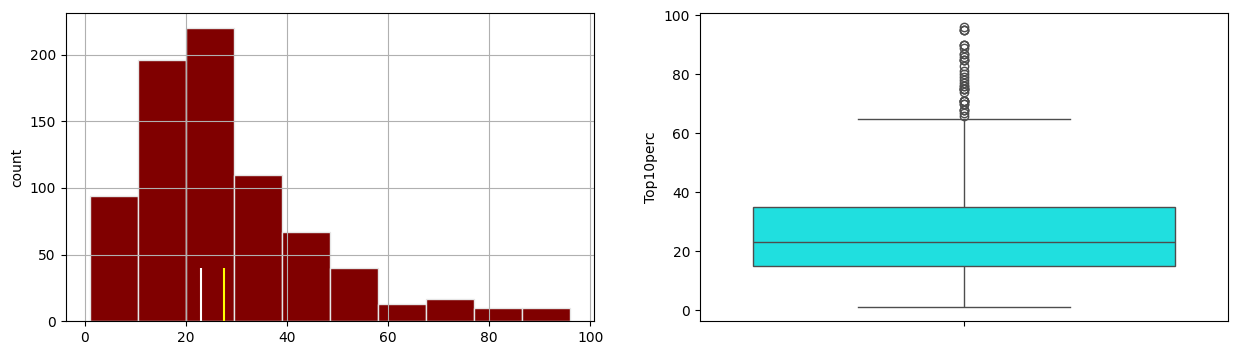

Top25perc
Skew : 0.26


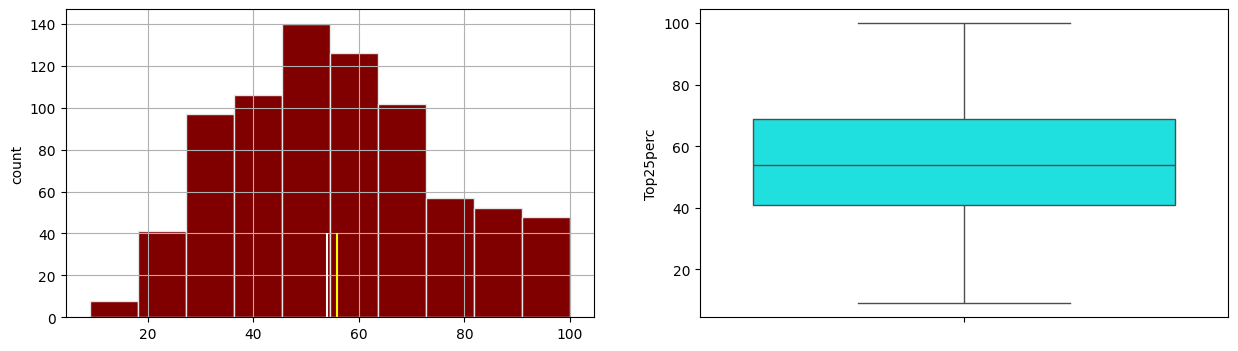

F.Undergrad
Skew : 2.61


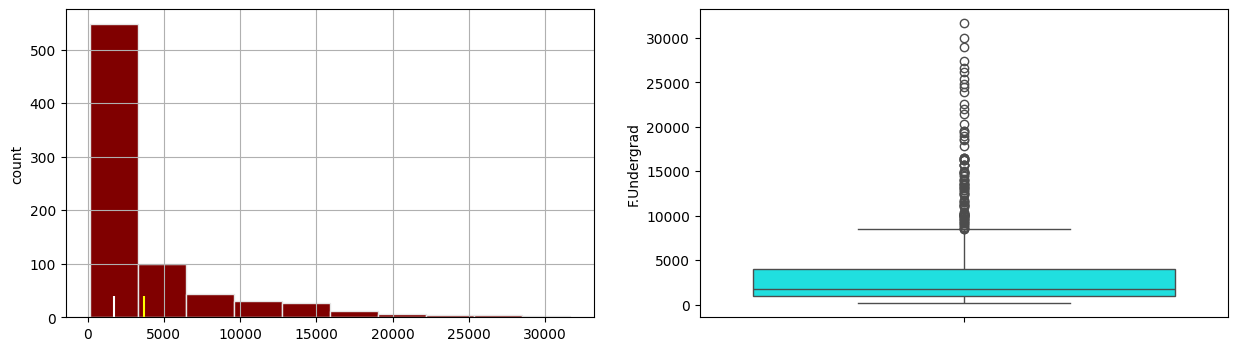

P.Undergrad
Skew : 5.69


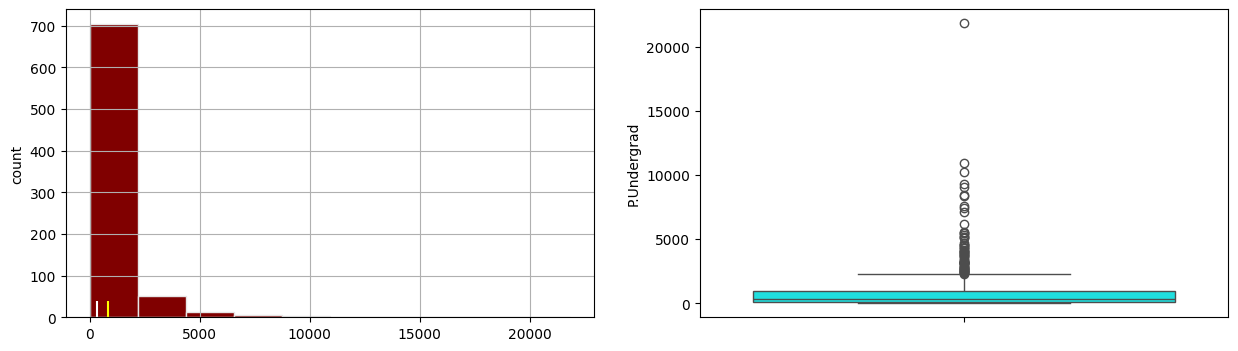

Outstate
Skew : 0.51


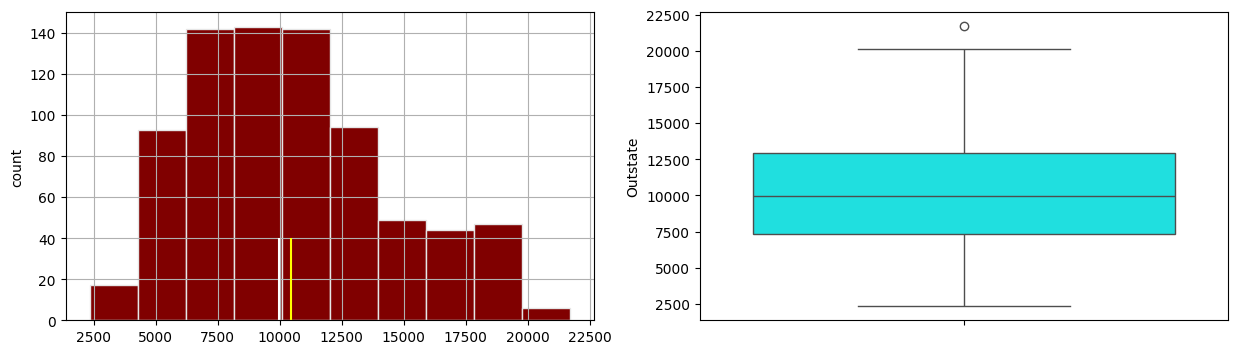

Room.Board
Skew : 0.48


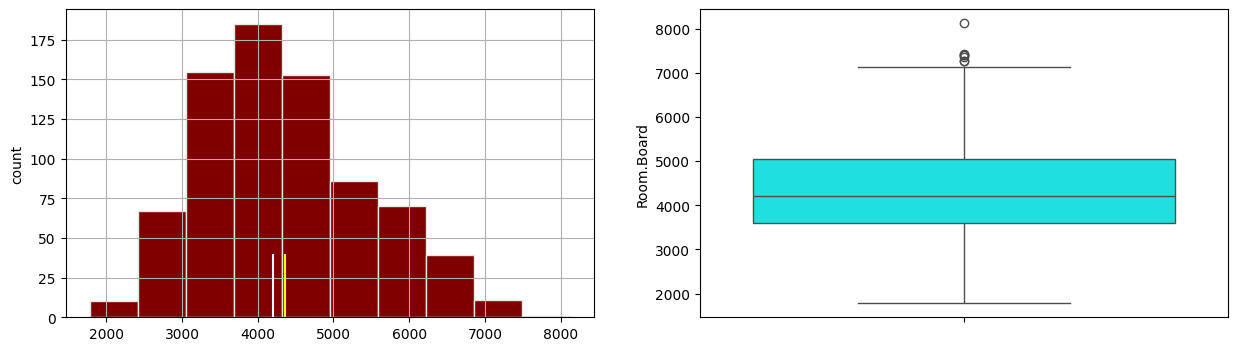

Books
Skew : 3.49


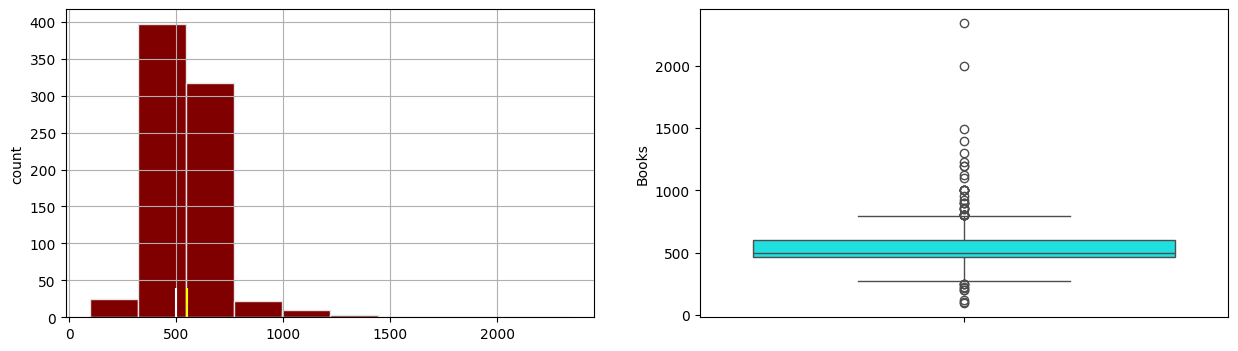

Personal
Skew : 1.74


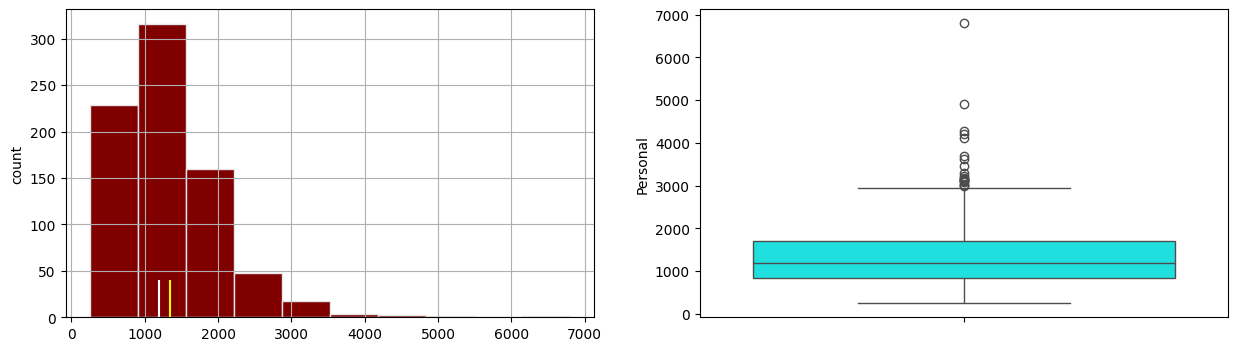

PhD
Skew : -0.77


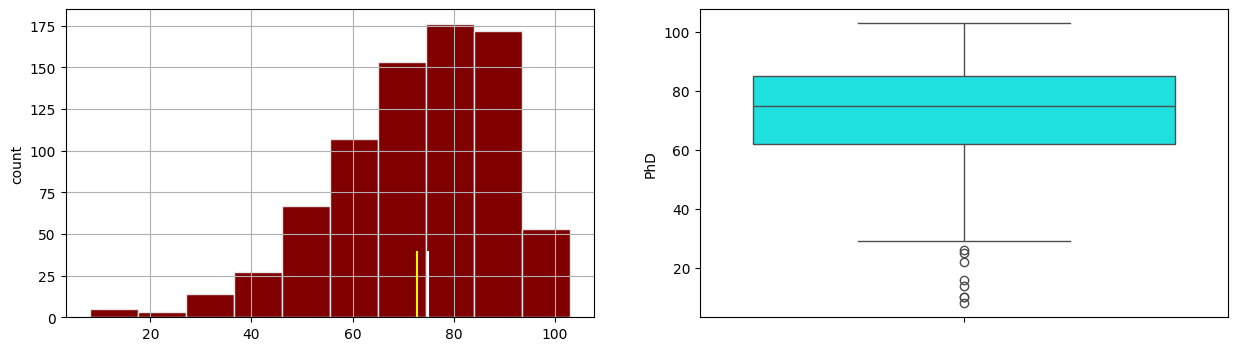

Terminal
Skew : -0.82


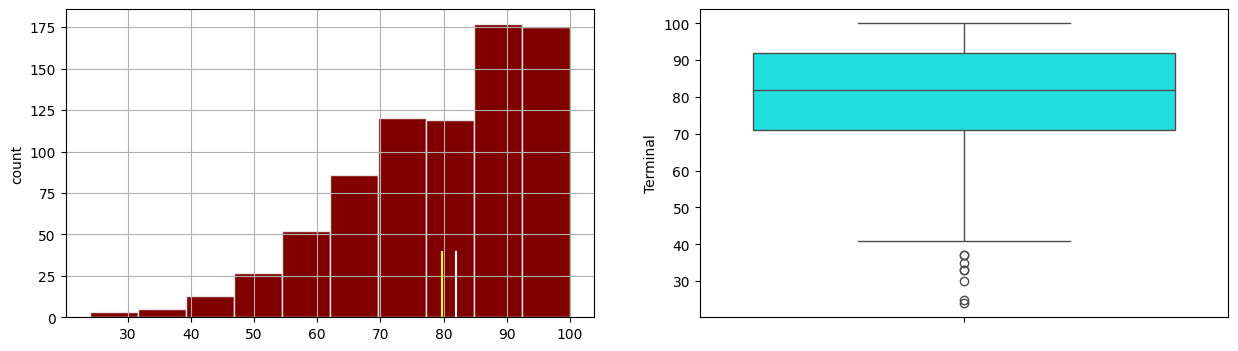

S.F.Ratio
Skew : 0.67


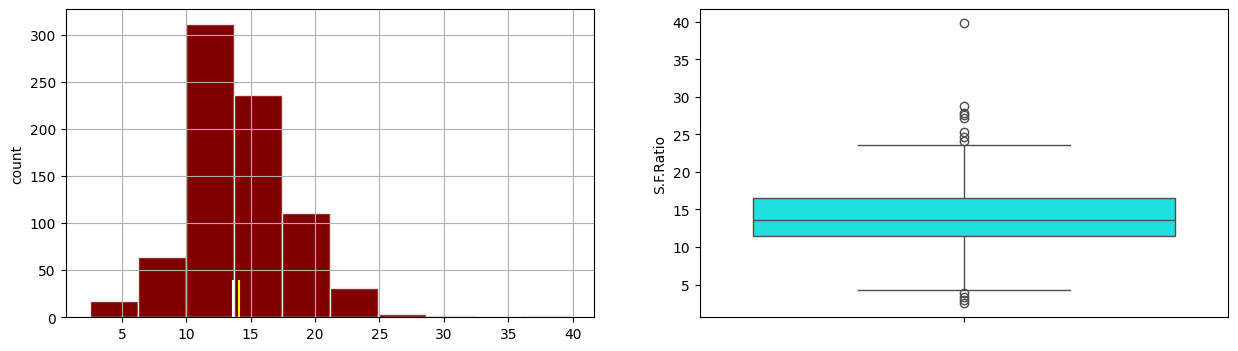

perc.alumni
Skew : 0.61


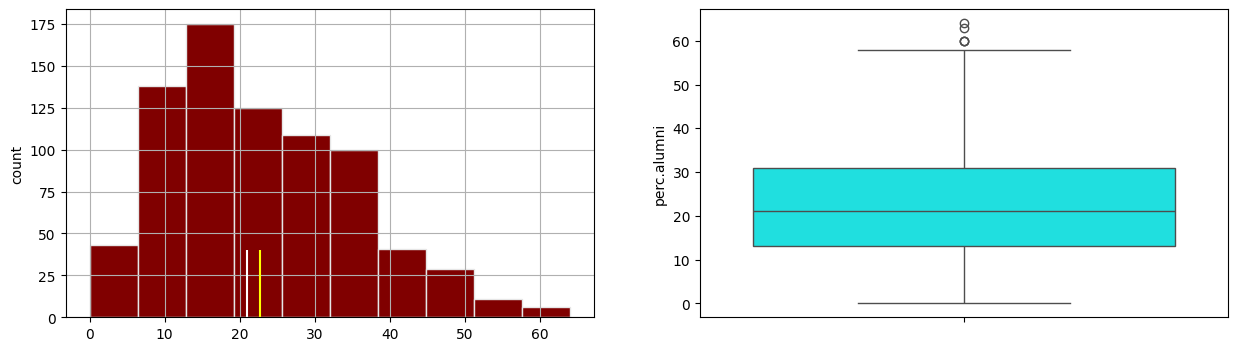

Expend
Skew : 3.46


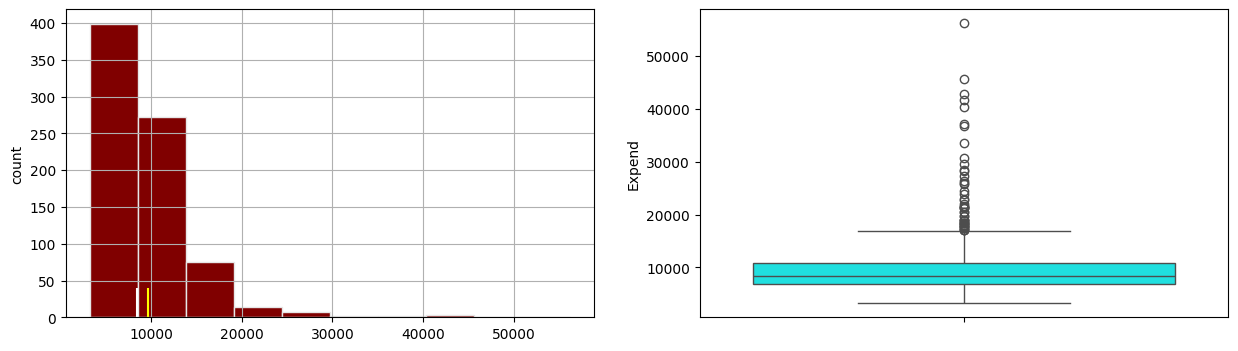

Grad.Rate
Skew : -0.11


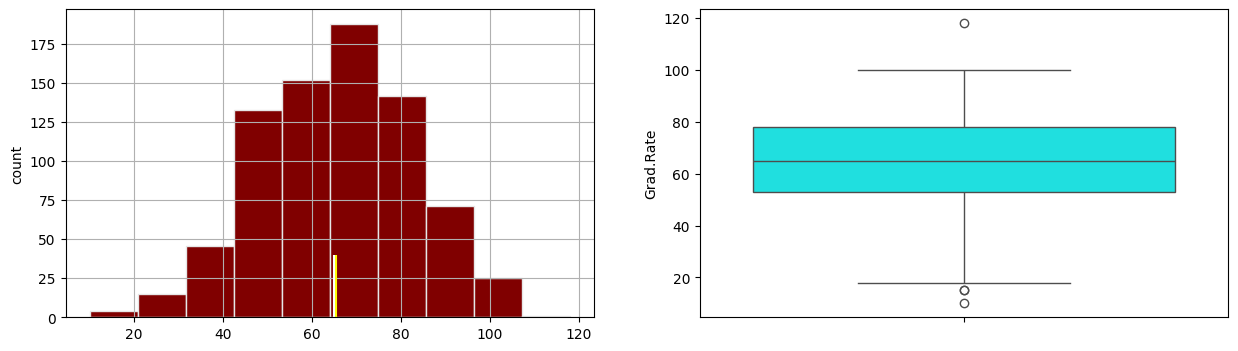

In [66]:
cont_cols = list(df.columns[1:])
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10,edgecolor='#E6E6E6', color='Maroon')  #Complete the code to create a histogram
    plt.vlines(df[col].mean(),ymin = 0, ymax = 40,color = 'Yellow')  #Complete the code to find the mean
    plt.vlines(df[col].median(),ymin = 0, ymax = 40,color = 'White')  #Complete the code to find the median
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='Cyan')
    plt.savefig('{}_PLOT.png'.format(col))
    plt.show()

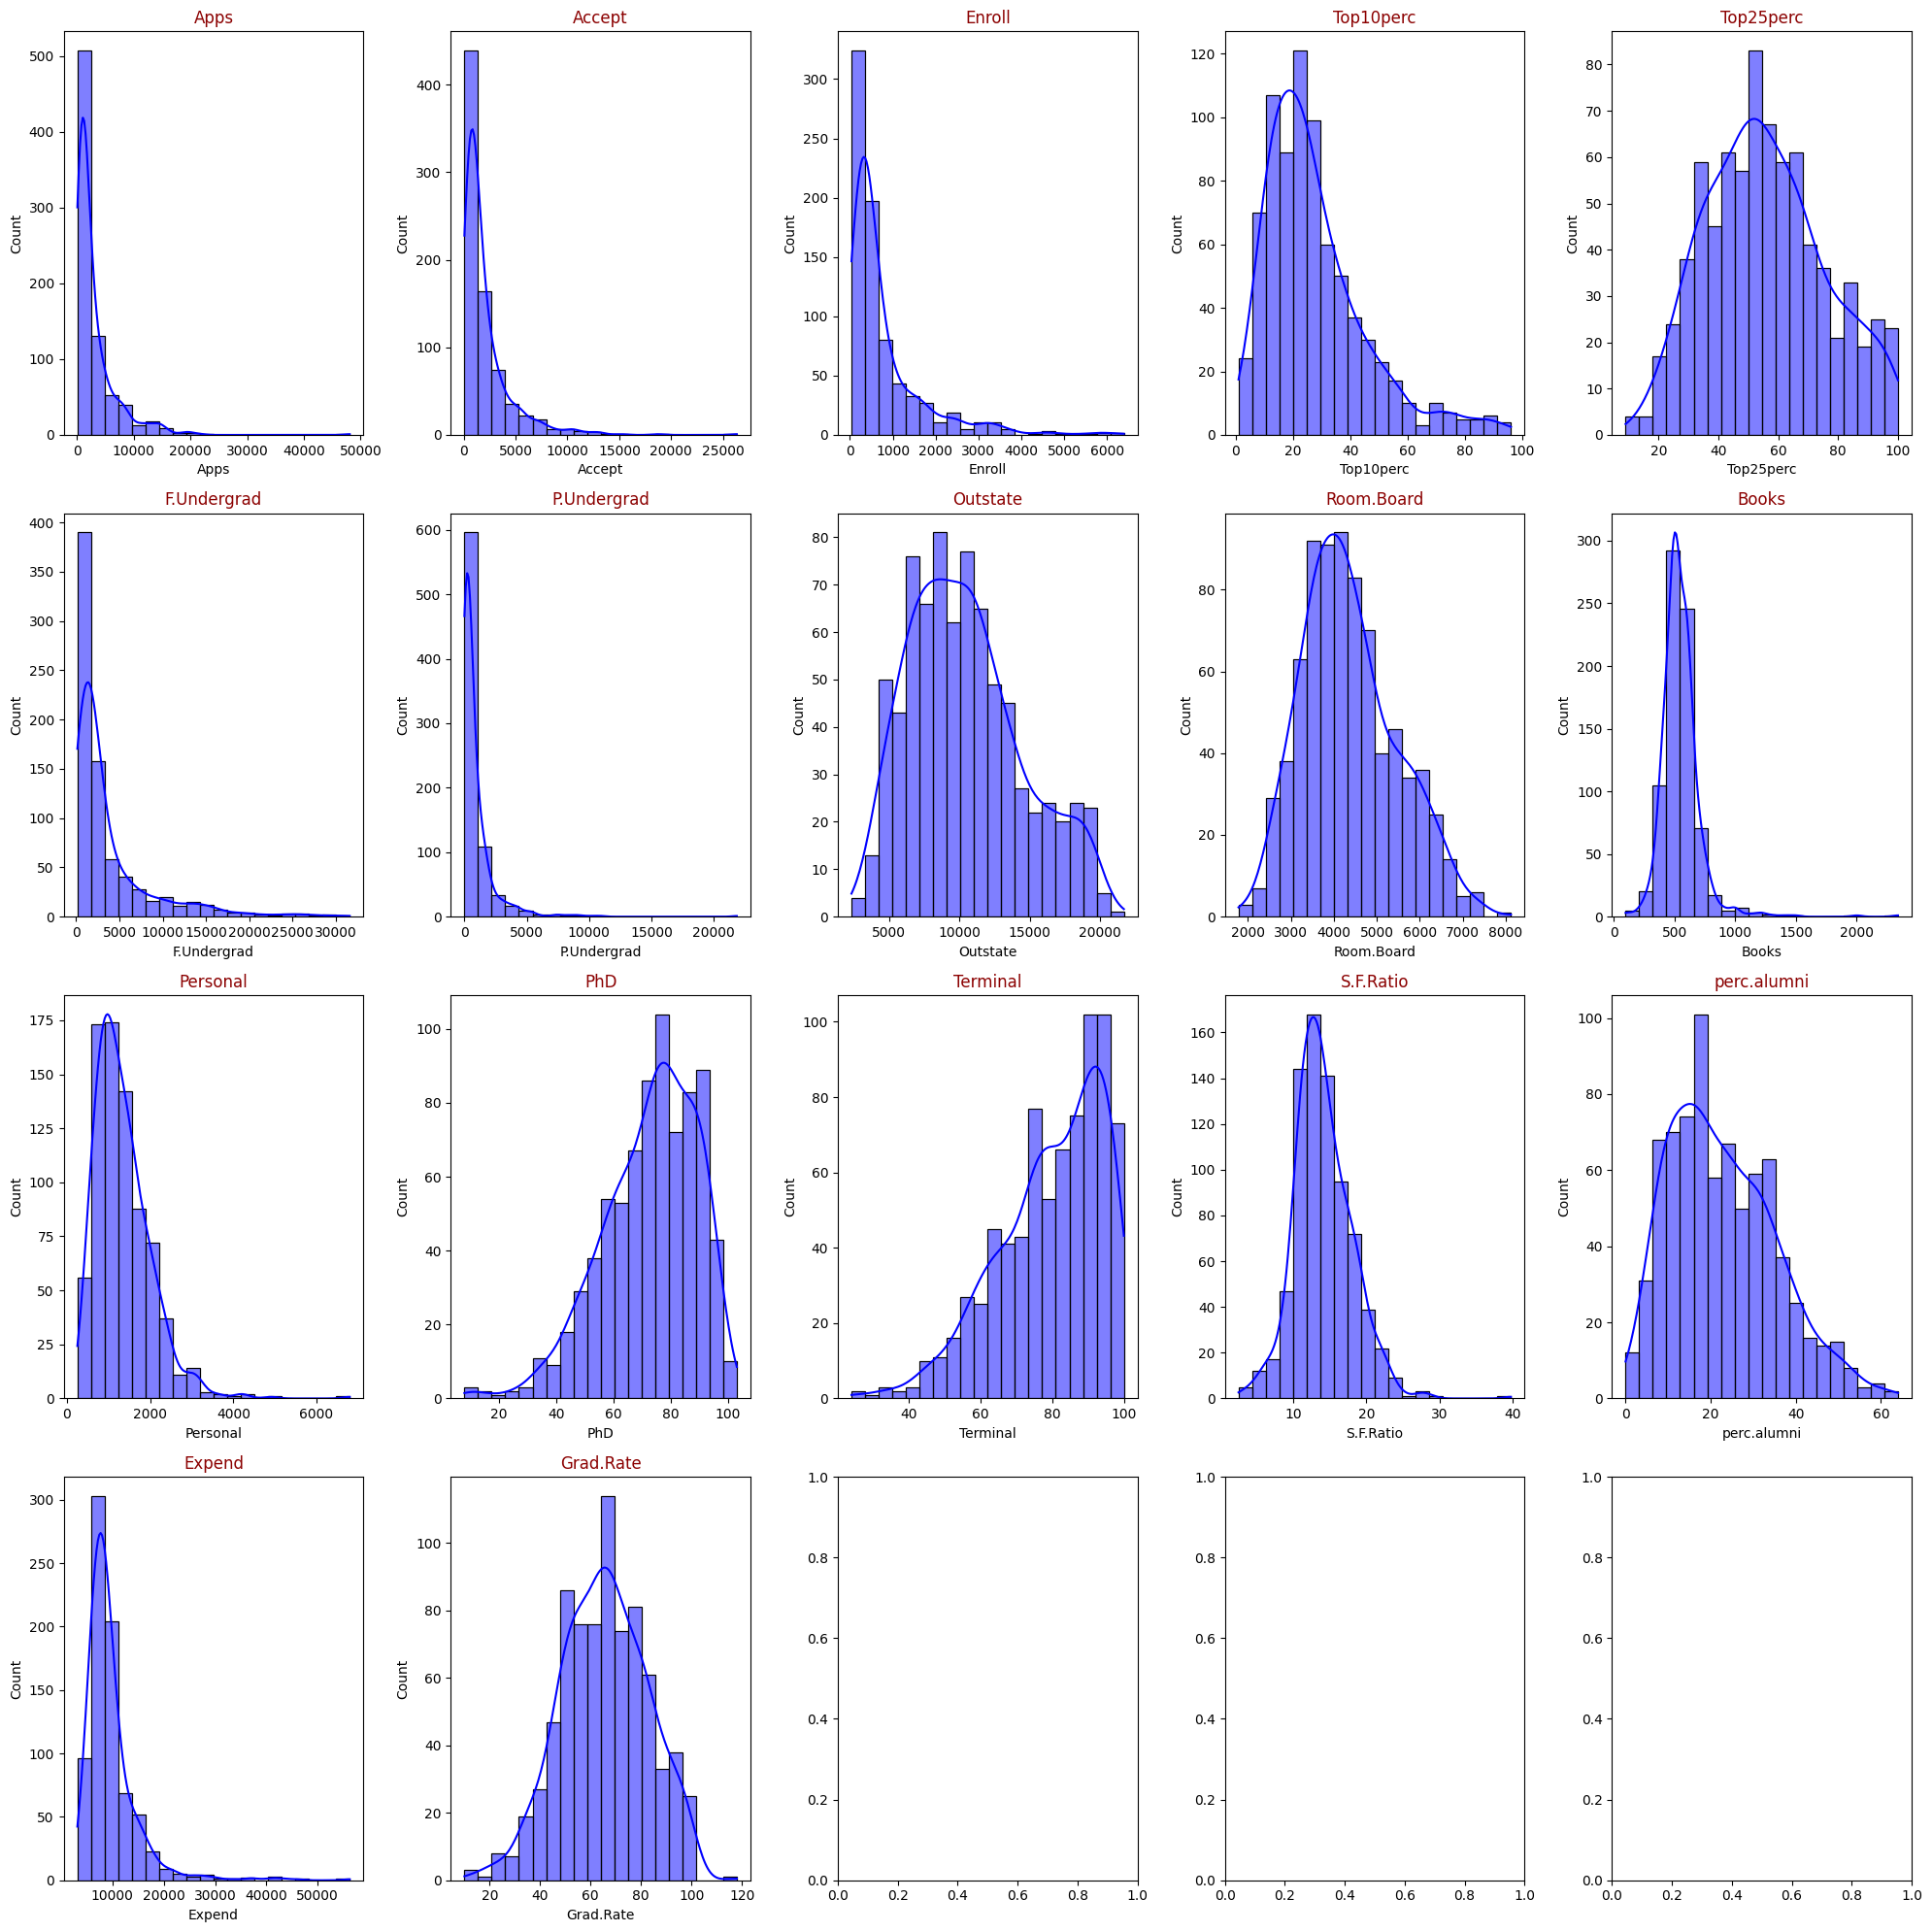

In [70]:
data_scatter = df.copy(deep=True)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))

for i, col in enumerate(data_scatter.columns[1:]):
    ax = axes[i // 5, i % 5]
    sns.histplot(data_scatter[col], bins=20, color='Blue', ax=ax, kde=True) # Complete the code to show the distribution
    ax.set_title(col, color='DarkRed')

plt.tight_layout()

In [ ]:

data_scatter=df.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,5,i+1)
    sns.'_____'(data_scatter[data_scatter.columns[i]],color= 'Cyan') ## Complete the code to build boxplot
    ax.set_title(data_scatter.columns[i],color='Black')
plt.tight_layout()

### Bivariate Analysis

Accept vs Apps


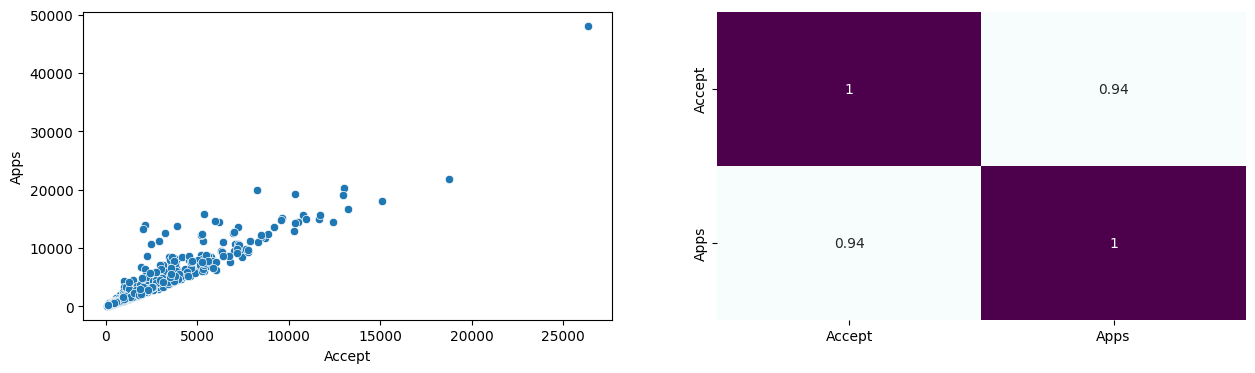

Enroll vs Accept


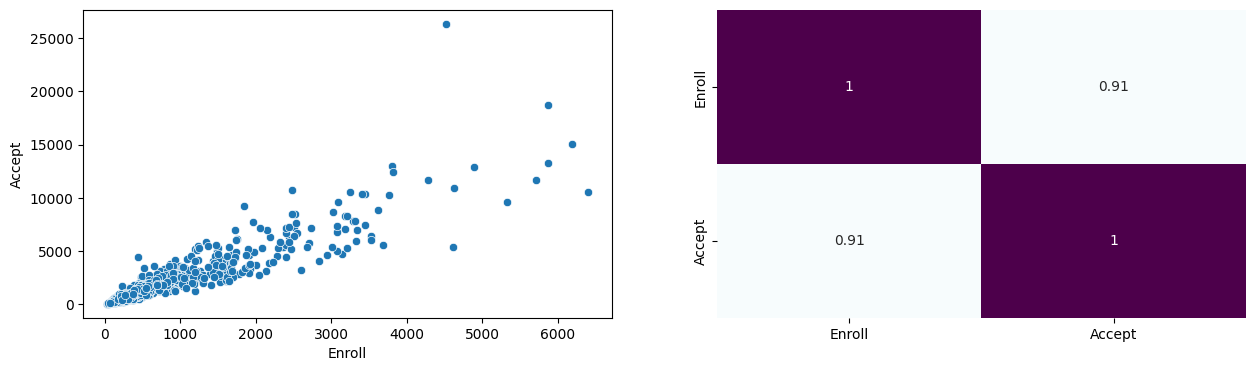

Top10perc vs Enroll


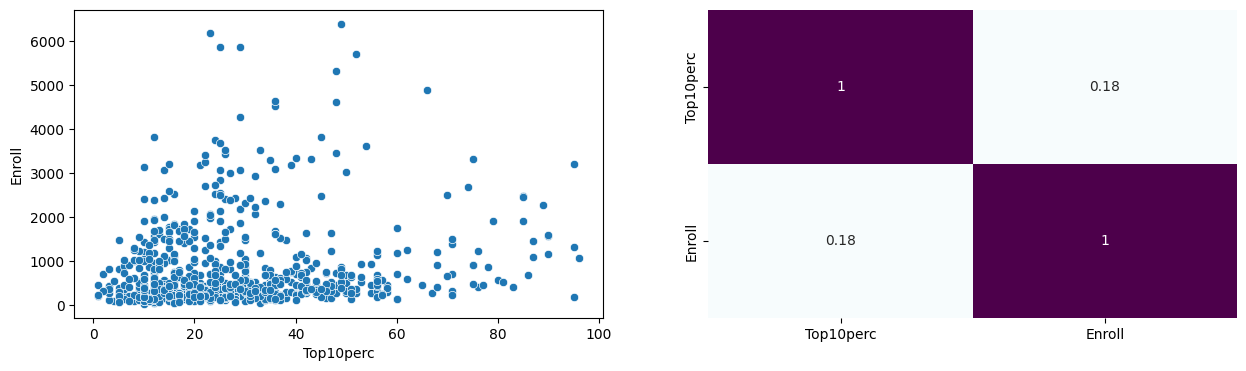

Top25perc vs Top10perc


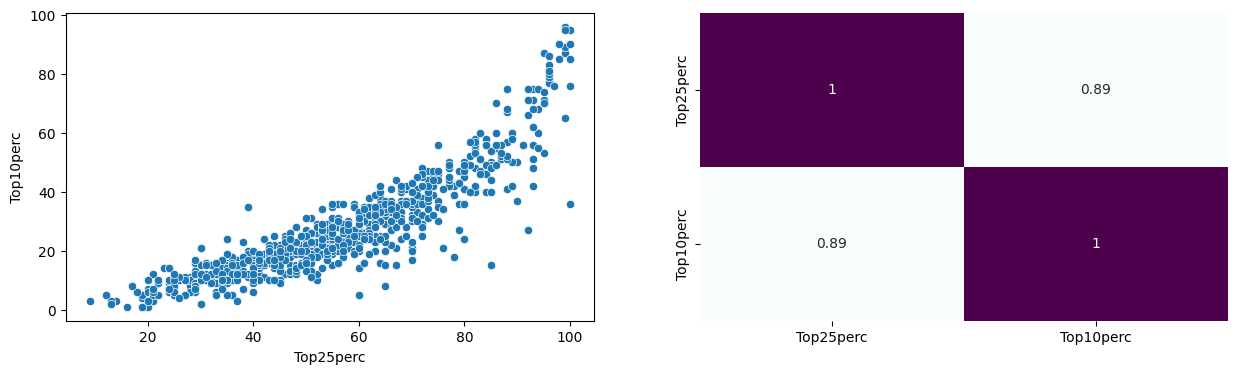

F.Undergrad vs Top25perc


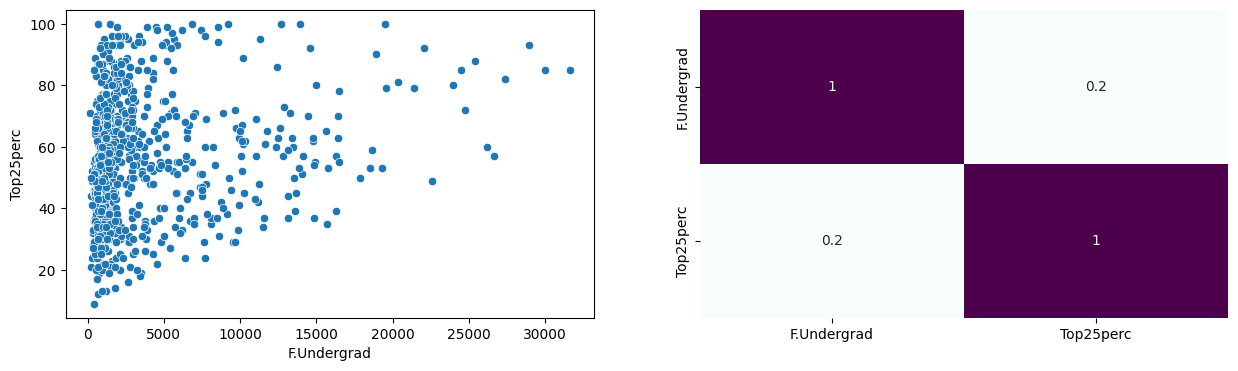

P.Undergrad vs F.Undergrad


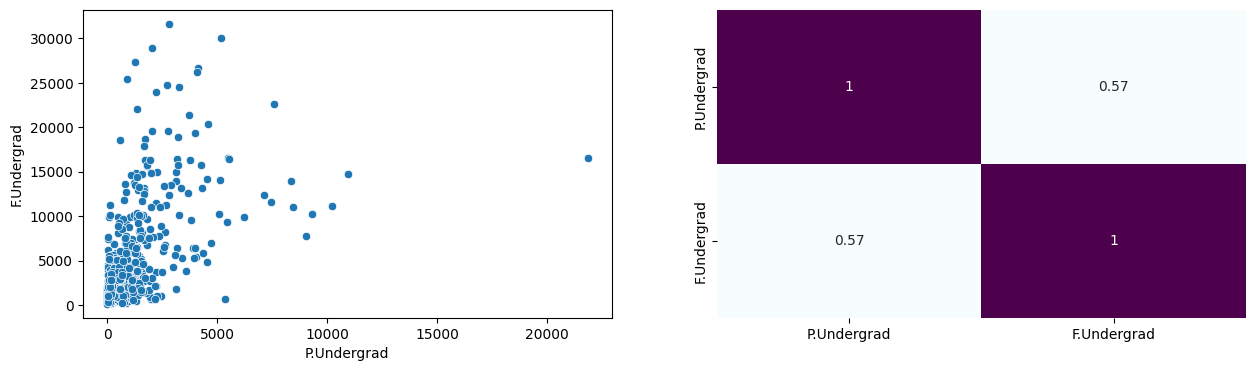

Outstate vs P.Undergrad


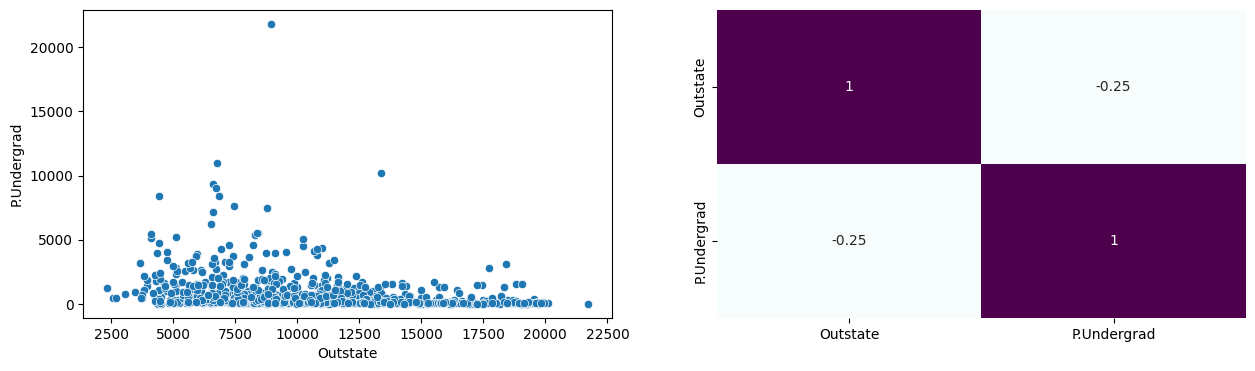

Room.Board vs Outstate


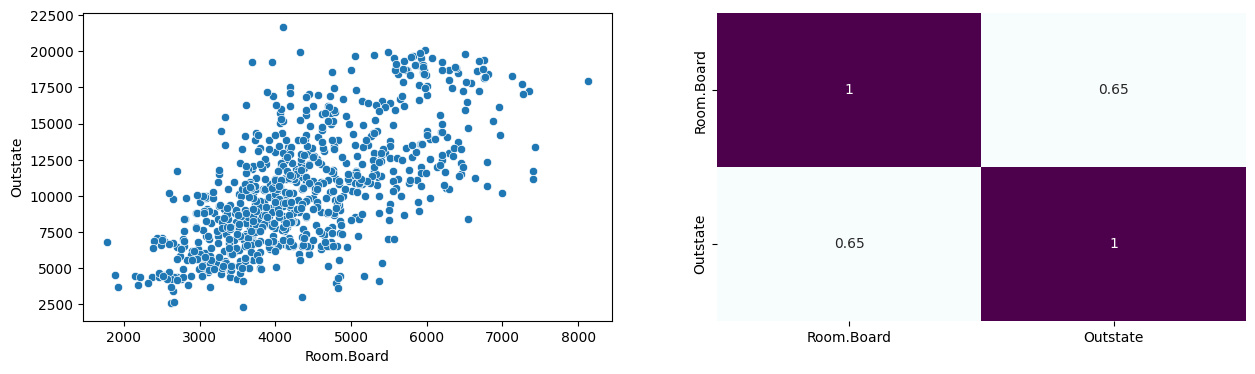

Books vs Room.Board


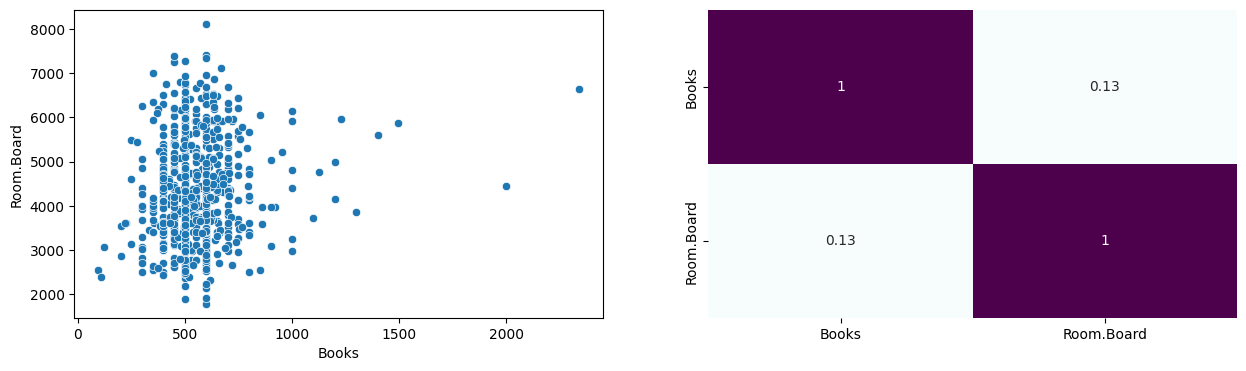

Personal vs Books


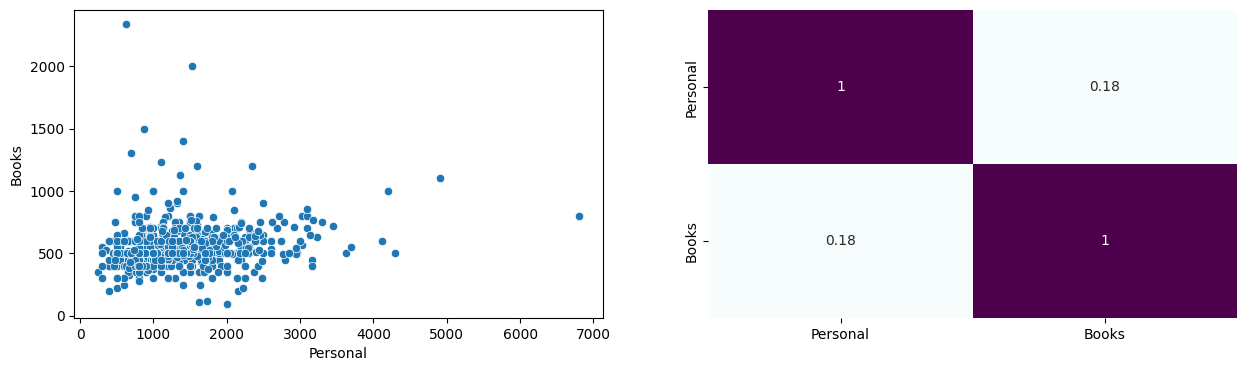

PhD vs Personal


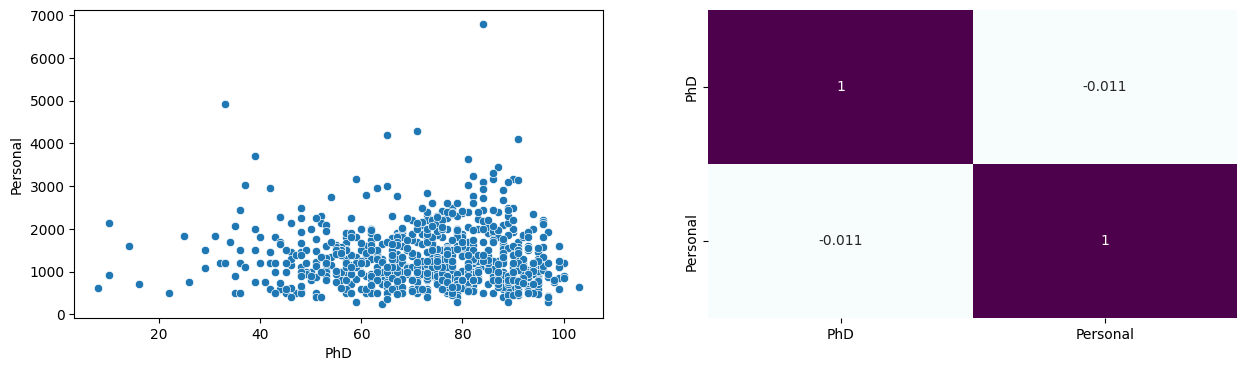

Terminal vs PhD


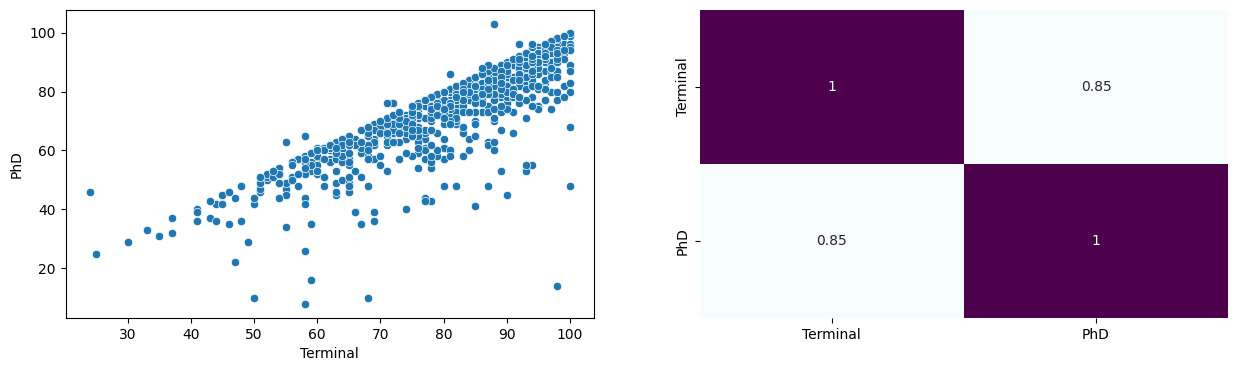

S.F.Ratio vs Terminal


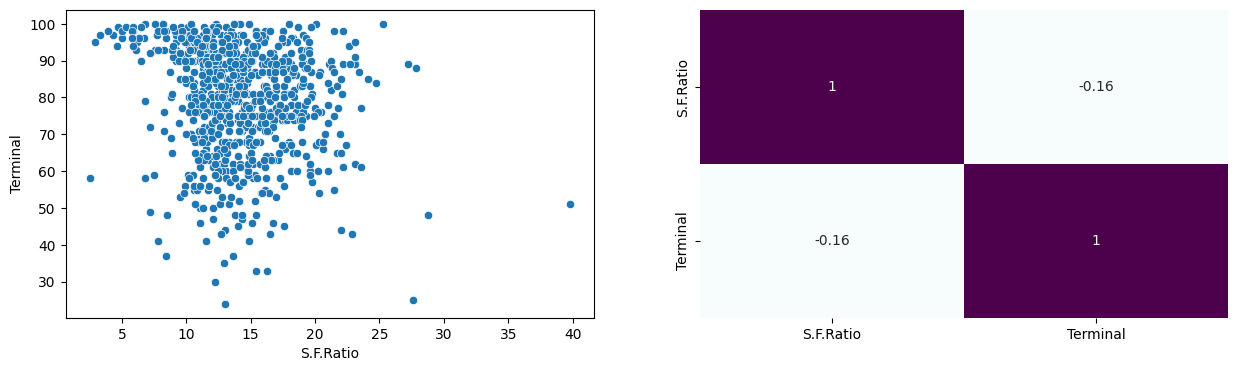

perc.alumni vs S.F.Ratio


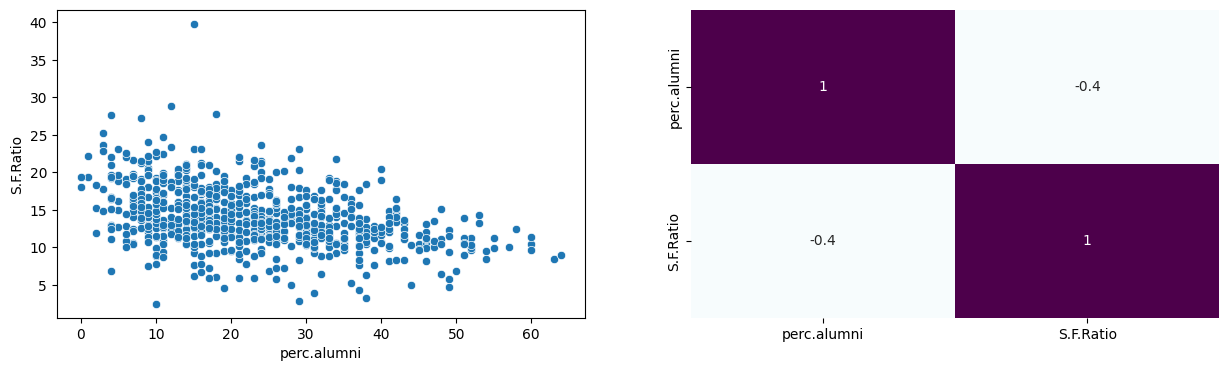

Expend vs perc.alumni


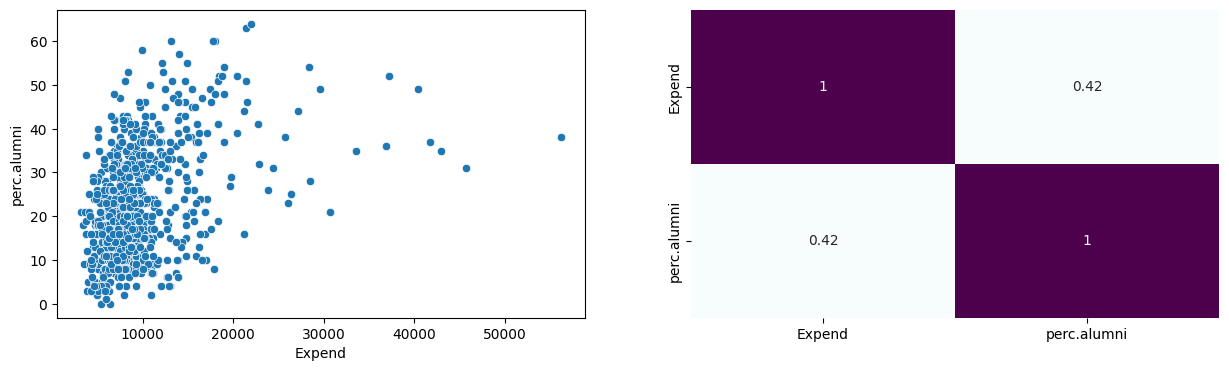

Grad.Rate vs Expend


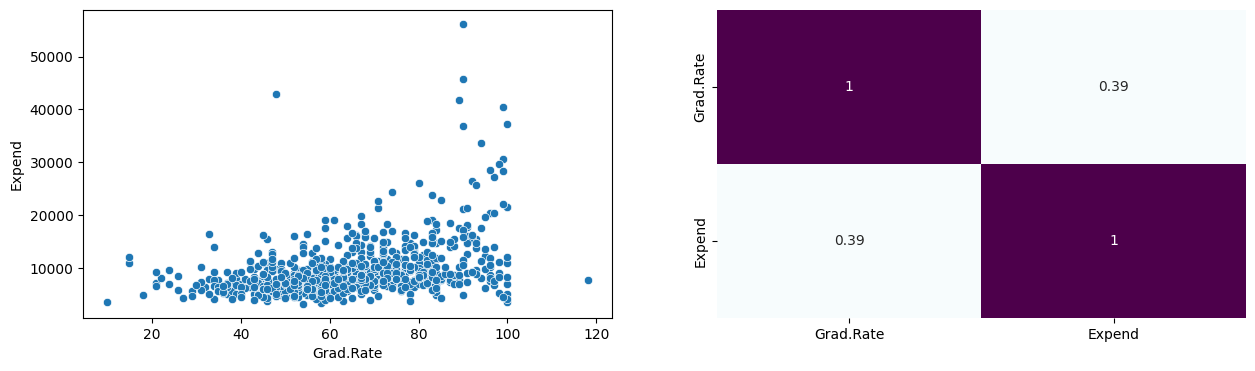

In [72]:
sns.color_palette("pastel")

cont_cols = list(df.columns[1:])
for col in range(1, len(cont_cols)):
    print(cont_cols[col], 'vs', cont_cols[col-1])
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[cont_cols[col]], y=df[cont_cols[col-1]]) ## Complete the code to build a scatterplot
    plt.subplot(1, 2, 2)
    sns.heatmap(np.corrcoef(df[cont_cols[col]], df[cont_cols[col-1]]), annot=True,
                yticklabels=[cont_cols[col], cont_cols[col-1]], xticklabels=[cont_cols[col], cont_cols[col-1]],
                cmap='BuPu', cbar=False) ## Complete the code to build a heatmap
    plt.show()

#### Is there any correlation between the columns?

<Axes: >

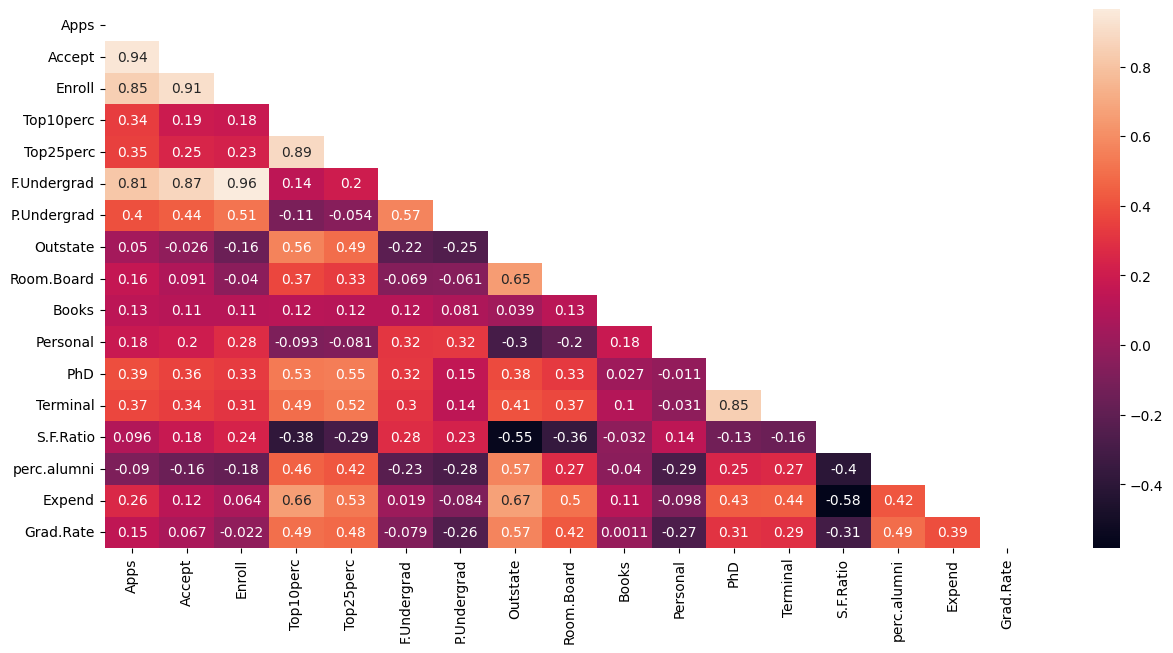

In [81]:
sns.color_palette("tab10")
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df[list(df.columns[1:])].corr(), dtype=bool))
sns.heatmap(df[list(df.columns[1:])].corr(),annot = True,mask=mask) ## Complete the code to show the correrlation using heatmap

## Conclusions and Recommendations

#### Conclusions:
*  

#### Recommendations:
*  

___